# IMPORT REQURIED LIBRARIES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

# Import datasets from keras.datasets

In [3]:
from numpy import load
data = load('/kaggle/input/cifar10-keras-files-cifar10load-data/cifar-10.npz')
lst = data.files
for item in lst:
    print(item)

x_train
y_train
x_test
y_test


In [7]:
X_train, y_train = data['x_train'], data['y_train']
X_test, y_test = data['x_test'], data['y_test']

In [8]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [9]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

# Visualization

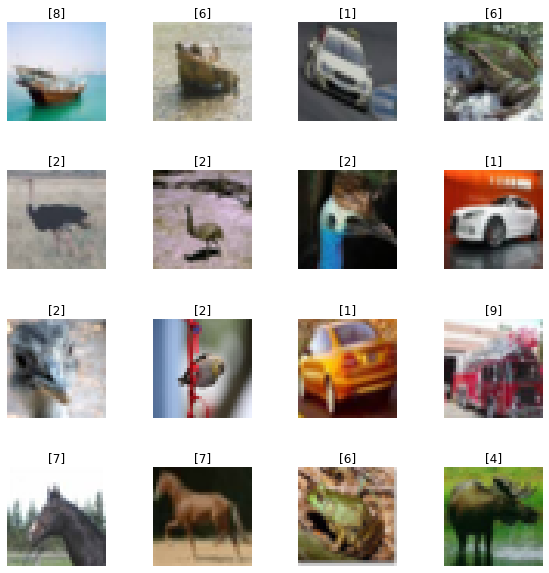

In [17]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(W_grid, L_grid, figsize=(10,10))
axes = axes.ravel()
n = len(X_train)
for i in range(0, W_grid*L_grid):
    index = np.random.randint(0,n)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.5)

In [18]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

number = 10

In [20]:
import keras
y_train = keras.utils.to_categorical(y_train, number)

In [22]:
y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 (50000, 10))

In [24]:
y_test = keras.utils.to_categorical(y_test, number)


In [26]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [27]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 10))

In [35]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

# Train model

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

model = Sequential()
model.add(Conv2D(64, (3,3),input_shape=input_shape, activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [44]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
50000/50000 [==============================] - 228s 5ms/step - loss: 2.2751 - accuracy: 0.3332
Epoch 2/5
50000/50000 [==============================] - 227s 5ms/step - loss: 1.4918 - accuracy: 0.4832
Epoch 3/5
50000/50000 [==============================] - 227s 5ms/step - loss: 1.3843 - accuracy: 0.5316
Epoch 4/5
50000/50000 [==============================] - 228s 5ms/step - loss: 1.3742 - accuracy: 0.5392
Epoch 5/5
50000/50000 [==============================] - 228s 5ms/step - loss: 1.3815 - accuracy: 0.5504


# Evaluate the model

In [45]:
Evl = model.evaluate(X_test,y_test)
print(Evl)

10000/10000 [==============================] - 10s 1ms/step
[1.180610959625244, 0.6218000054359436]


In [47]:
y_prid = model.predict_classes(X_test)
y_prid

array([6, 0, 9, ..., 5, 1, 7])

In [48]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

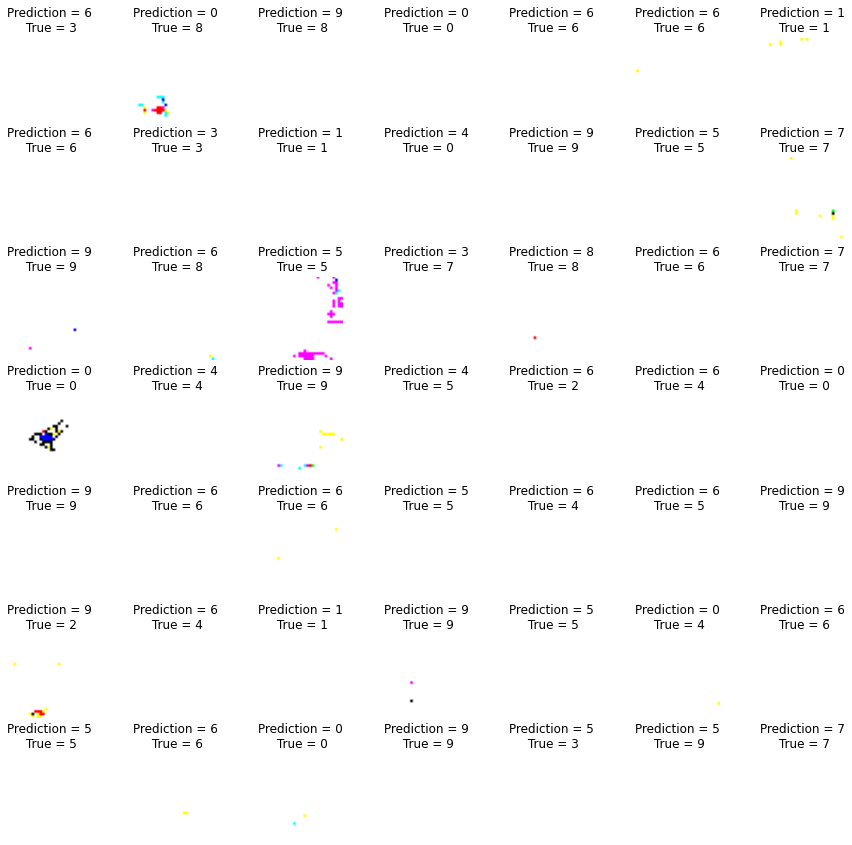

In [51]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_prid[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)    

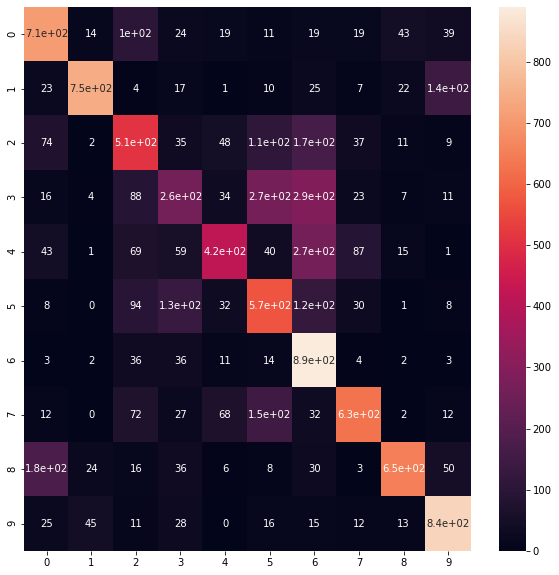

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_prid)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)